In [22]:
# DATA301-01
# Emma Sauerborn and Shad Hussain
# Project 1

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd

In [24]:
#~/DATA301/Projects/DATA301-Project1/superstore.csv'
# for Shad to pass into the read_csv ^^^
store = pd.read_csv('./superstore.csv')
store

# Extracting day, month, year from order date
store['Order Month'] = store["Order Date"].map(lambda date: date.split('/')[0]).astype(str)
store['Order Day'] = store["Order Date"].map(lambda date: date.split('/')[1]).astype(str)
store['Order Year'] = store["Order Date"].map(lambda date: date.split('/')[2]).astype(str)

# Extracting day, month, year from ship date
store['Ship Month'] = store["Ship Date"].map(lambda date: date.split('/')[0]).astype(str)
store['Ship Day'] = store["Ship Date"].map(lambda date: date.split('/')[1]).astype(str)
store['Ship Year'] = store["Ship Date"].map(lambda date: date.split('/')[2]).astype(str)

def reorderDate(date):
    year = date[2]
    month = date[0] if len(date[0]) == 2 else "0" + date[0]
    day = date[1] if len(date[1]) == 2 else "0" + date[1]
    return np.array([year, month, day])

store["New Order Date"] = store["Order Date"].map(lambda date: np.datetime64(pd.Series(reorderDate(date.split('/'))).str.cat(sep='-')))
store["New Ship Date"] = store["Ship Date"].map(lambda date: np.datetime64(pd.Series(reorderDate(date.split('/'))).str.cat(sep='-')))
store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,Order Month,Order Day,Order Year,Ship Month,Ship Day,Ship Year,New Order Date,New Ship Date
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,11,8,2016,11,11,2016,2016-11-08,2016-11-11
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,11,8,2016,11,11,2016,2016-11-08,2016-11-11
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,6,12,2016,6,16,2016,2016-06-12,2016-06-16
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,10,11,2015,10,18,2015,2015-10-11,2015-10-18
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,10,11,2015,10,18,2015,2015-10-11,2015-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,0.20,4.1028,1,21,2014,1,23,2014,2014-01-21,2014-01-23
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.00,15.6332,2,26,2017,3,3,2017,2017-02-26,2017-03-03
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.20,19.3932,2,26,2017,3,3,2017,2017-02-26,2017-03-03
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.00,13.3200,2,26,2017,3,3,2017,2017-02-26,2017-03-03


In [25]:
# Compute number of days between ship and order
store['diff_days'] = store['New Ship Date'] - store['New Order Date']
store['diff_days'] = store['diff_days'] / np.timedelta64(1, "D")
store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Profit,Order Month,Order Day,Order Year,Ship Month,Ship Day,Ship Year,New Order Date,New Ship Date,diff_days
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.9136,11,8,2016,11,11,2016,2016-11-08,2016-11-11,3.0
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,219.5820,11,8,2016,11,11,2016,2016-11-08,2016-11-11,3.0
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6.8714,6,12,2016,6,16,2016,2016-06-12,2016-06-16,4.0
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,-383.0310,10,11,2015,10,18,2015,2015-10-11,2015-10-18,7.0
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2.5164,10,11,2015,10,18,2015,2015-10-11,2015-10-18,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,4.1028,1,21,2014,1,23,2014,2014-01-21,2014-01-23,2.0
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,15.6332,2,26,2017,3,3,2017,2017-02-26,2017-03-03,5.0
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,19.3932,2,26,2017,3,3,2017,2017-02-26,2017-03-03,5.0
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,13.3200,2,26,2017,3,3,2017,2017-02-26,2017-03-03,5.0


In [26]:
tmp = store[["Order Year", "Order Month"]].value_counts()
store_ym = store.reset_index().groupby(["Order Year", "Order Month"])[["Quantity", "Sales", "Profit"]].sum()
store_ym["Number of Sales"] = tmp
store_ym.rename(columns={"Quantity": "Number of Sold Items", "Sales": "Revenue", "Profit": "Loss/Profit"}, inplace=True)
store_ym

Number of Sold Items      Revenue  Loss/Profit  \
Order Year Order Month                                                   
2014       1                             284   14236.8950    2450.1907   
           10                            573   31453.3930    3448.2573   
           11                           1219   78628.7167    9292.1269   
           12                           1079   69545.6205    8983.5699   
           2                             159    4519.8920     862.3084   
           3                             585   55691.0090     498.7299   
           4                             536   28295.3450    3488.8352   
           5                             466   23648.2870    2738.7096   
           6                             521   34595.1276    4976.5244   
           7                             550   33946.3930    -841.4826   
           8                             609   27909.4685    5318.1050   
           9                            1000   81777.3508    8328.0994   
2015       1                             236   18174.0756   -3281.0070   
           10                            631   31404.9235    2817.3660   
           11                           1310   75972.5635   12474.7884   
           12                           1203   74919.5212    8016.9659   
           2                             239   11951.4110    2813.8508   
           3                             515   38726.2520    9732.0978   
           4                             543   34195.2085    4187.4962   
           5                             575   30131.6865    4667.8690   
           6                             486   24797.2920    3335.5572   
           7                             557   28765.3250    3288.6483   
           8                             598   36898.3322    5355.8084   
           9                            1086   64595.9180    8209.1627   
2016       1                             358   18542.4910    2824.8233   
           10                            767   59687.7450   16243.1425   
           11                           1406   79411.9658    4011.4075   
           12                           1414   96999.0430   17885.3093   
           2                             306   22978.8150    5004.5795   
           3                             579   51715.8750    3611.9680   
           4                             635   38750.0390    2977.8149   
           5                             863   56987.7280    8662.1464   
           6                             742   40344.5340    4750.3781   
           7                             758   39261.9630    4432.8779   
           8                             693   31115.3743    2062.0693   
           9                            1316   73410.0249    9328.6576   
2017       1                             597   43971.3740    7140.4391   
           10                           1133   77776.9232    9275.2755   
           11                           1840  118447.8250    9690.1037   
           12                           1723   83829.3188    8483.3468   
           2                             363   20301.1334    1613.8720   
           3                             885   58872.3528   14751.8915   
           4                             733   36521.5361     933.2900   
           5                             887   44261.1102    6342.5828   
           6                             931   52981.7257    8223.3357   
           7                             840   45264.4160    6952.6212   
           8                             884   63120.8880    9040.9557   
           9                            1660   87866.6520   10991.5556   

                        Number of Sales  
Order Year Order Month                   
2014       1                         79  
           10                       159  
           11                       318  
           12                       278  
           2                         46  
           3                 

In [27]:
tmp = store["Region"].value_counts()
store_r = store.reset_index().groupby(["Region"])[["Quantity", "Sales", "Profit"]].sum()
store_r["Number of Sales"] = tmp
store_r.rename(columns={"Quantity": "Number of Sold Items", "Sales": "Revenue", "Profit": "Loss/Profit"}, inplace=True)
store_r

,Number of Sold Items,Revenue,Loss/Profit,Number of Sales
Region,,,,
Central,8780,501239.8908,39706.3625,2323
East,10618,678781.2400,91522.7800,2848
South,6209,391721.9050,46749.4303,1620
West,12266,725457.8245,108418.4489,3203


In [28]:
tmp = store["State"].value_counts()
store_s = store.reset_index().groupby(["State"])[["Quantity", "Sales", "Profit"]].sum()
store_s["Number of Sales"] = tmp
store_s.rename(columns={"Quantity": "Number of Sold Items", "Sales": "Revenue", "Profit": "Loss/Profit"}, inplace=True)
store_s

,Number of Sold Items,Revenue,Loss/Profit,Number of Sales
State,,,,
Alabama,256,19510.6400,5786.8253,61
Arizona,862,35282.0010,-3427.9246,224
Arkansas,240,11678.1300,4008.6871,60
California,7667,457687.6315,76381.3871,2001
Colorado,693,32108.1180,-6527.8579,182
Connecticut,281,13384.3570,3511.4918,82
Delaware,367,27451.0690,9977.3748,96
District of Columbia,40,2865.0200,1059.5893,10
Florida,1379,89473.7080,-3399.3017,383


In [29]:
tmp = store["Ship Mode"].value_counts()
store_sm = store.reset_index().groupby(["Ship Mode"])[["Quantity", "Sales", "Profit"]].sum()
store_sm["Number of Sales"] = tmp
store_sm.rename(columns={"Quantity": "Number of Sold Items", "Sales": "Revenue", "Profit": "Loss/Profit"}, inplace=True)
store_sm

,Number of Sold Items,Revenue,Loss/Profit,Number of Sales
Ship Mode,,,,
First Class,5693,3.514284e+05,48969.8399,1538
Same Day,1960,1.283631e+05,15891.7589,543
Second Class,7423,4.591936e+05,57446.6354,1945
Standard Class,22797,1.358216e+06,164088.7875,5968


In [30]:
tmp = store["Segment"].value_counts()
store_seg = store.reset_index().groupby(["Segment"])[["Quantity", "Sales", "Profit"]].sum()
store_seg["Number of Sales"] = tmp
store_seg.rename(columns={"Quantity": "Number of Sold Items", "Sales": "Revenue", "Profit": "Loss/Profit"}, inplace=True)
store_seg

,Number of Sold Items,Revenue,Loss/Profit,Number of Sales
Segment,,,,
Consumer,19521,1.161401e+06,134119.2092,5191
Corporate,11608,7.061464e+05,91979.1340,3020
Home Office,6744,4.296531e+05,60298.6785,1783


In [31]:
tmp = store[["Category", "Sub-Category"]].value_counts()
store_c = store.reset_index().groupby(["Category", "Sub-Category"])[["Quantity", "Sales", "Profit"]].sum()
store_c["Number of Sales"] = tmp
store_c.rename(columns={"Quantity": "Number of Sold Items", "Sales": "Revenue", "Profit": "Loss/Profit"}, inplace=True)
store_c

Number of Sold Items      Revenue  Loss/Profit  \
Category        Sub-Category                                                   
Furniture       Bookcases                      868  114879.9963   -3472.5560   
                Chairs                        2356  328449.1030   26590.1663   
                Furnishings                   3563   91705.1640   13059.1436   
                Tables                        1241  206965.5320  -17725.4811   
Office Supplies Appliances                    1729  107532.1610   18138.0054   
                Art                           3000   27118.7920    6527.7870   
                Binders                       5974  203412.7330   30221.7633   
                Envelopes                      906   16476.4020    6964.1767   
                Fasteners                      914    3024.2800     949.5182   
                Labels                        1400   12486.3120    5546.2540   
                Paper                         5178   78479.2060   34053.5693   
                Storage                       3158  223843.6080   21278.8264   
                Supplies                       647   46673.5380   -1189.0995   
Technology      Accessories                   2976  167380.3180   41936.6357   
                Copiers                        234  149528.0300   55617.8249   
                Machines                       440  189238.6310    3384.7569   
                Phones                        3289  330007.0540   44515.7306   

                              Number of Sales  
Category        Sub-Category                   
Furniture       Bookcases                 228  
                Chairs                    617  
                Furnishings               957  
                Tables                    319  
Office Supplies Appliances                466  
                Art                       796  
                Binders                  1523  
                Envelopes                 254  
                Fasteners                 217  
                Labels                    364  
                Paper                    1370  
                Storage                   846  
                Supplies                  190  
Technology      Accessories               775  
                Copiers                    68  
                Machines                  115  
                Phones                    889

In [32]:
tmp = store[["Order Year", "Order Month", "Region", "State", "Ship Mode", "Category", "Sub-Category", "Segment"]].value_counts()
store_mega = store.reset_index().groupby(["Order Year", "Order Month", "Region", "State", "Ship Mode", "Category", "Sub-Category", "Segment"])[["Quantity", "Sales", "Profit", "diff_days"]].sum()
store_mega["Number of Sales"] = tmp
store_mega.rename(columns={"Quantity": "Number of Sold Items", "Sales": "Revenue", "Profit": "Loss/Profit"}, inplace=True)
store_mega


Number of Sold Items  \
Order Year Order Month Region  State      Ship Mode      Category        Sub-Category Segment                             
2014       1           Central Illinois   Standard Class Office Supplies Binders      Home Office                     2   
                                                                         Labels       Home Office                     3   
                                                                         Storage      Home Office                     3   
                               Indiana    Standard Class Office Supplies Fasteners    Consumer                        3   
                               Michigan   Standard Class Furniture       Furnishings  Consumer                        6   
...                                                                                                                 ...   
2017       9           West    Washington Second Class   Office Supplies Storage      Consumer                        3   
                                          Standard Class Office Supplies Art          Consumer                        3   
                                                                                      Home Office                     1   
                                                                         Binders      Consumer                        5   
                                                         Technology      Accessories  Consumer                        1   

                                                                                                   Revenue  \
Order Year Order Month Region  State      Ship Mode      Category        Sub-Category Segment                
2014       1           Central Illinois   Standard Class Office Supplies Binders      Home Office    3.540   
                                                                         Labels       Home Office   11.784   
                                                                         Storage      Home Office  272.736   
                               Indiana    Standard Class Office Supplies Fasteners    Consumer       5.940   
                               Michigan   Standard Class Furniture       Furnishings  Consumer     287.670   
...                                                                                                    ...   
2017       9           West    Washington Second Class   Office Supplies Storage      Consumer      31.440   
                                          Standard Class Office Supplies Art          Consumer      12.420   
                                                                                      Home Office    7.580   
                                                                         Binders      Consumer      22.920   
                                                         Technology      Accessories  Consumer      19.990   

                                                                                                   Loss/Profit  \
Order Year Order Month Region  State      Ship Mode      Category        Sub-Category Segment                    
2014       1           Central Illinois   Standard Class Office Supplies Binders      Home Office      -5.4870   
                                                                         Labels       Home Office       4.2717   
                                                                         Storage      Home Office     -64.7748   
                               Indiana    Standard Class Office Supplies Fasteners    Consumer          0.0000   
                               Michigan   Standard Class Furniture       Furnishings  Consumer         34.8843   
...                                                                                                        ...   
2017       9           West    Washington Second Class   Office Supplies Storage      Consumer          8.4888   
                                          

<AxesSubplot:xlabel='Order Year'>

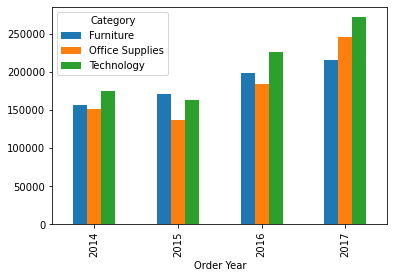

In [33]:
# 1
store_mega.reset_index().groupby(["Order Year", "Category"]).Revenue.sum().unstack().plot.bar()

<AxesSubplot:xlabel='Order Year'>

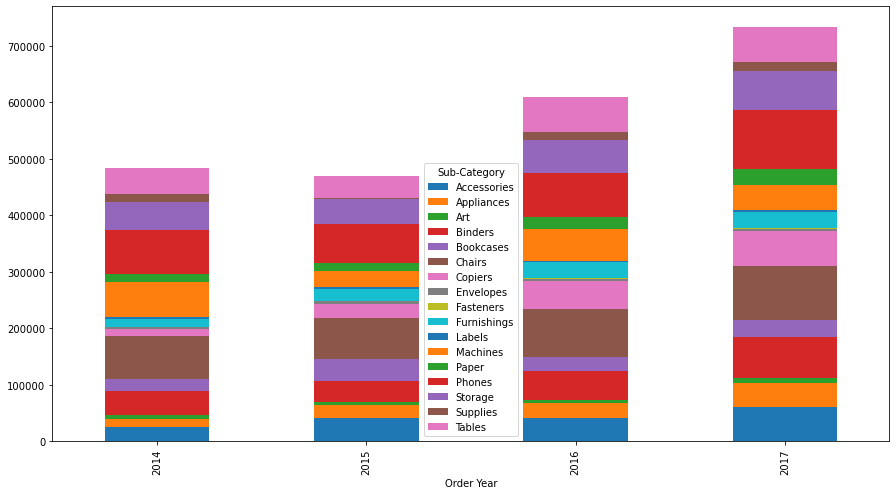

In [34]:
# 2
store_mega.reset_index().groupby(["Order Year", "Sub-Category"]).Revenue.sum().unstack().plot.bar(stacked=True, figsize=(15, 8))


<AxesSubplot:xlabel='Order Year'>

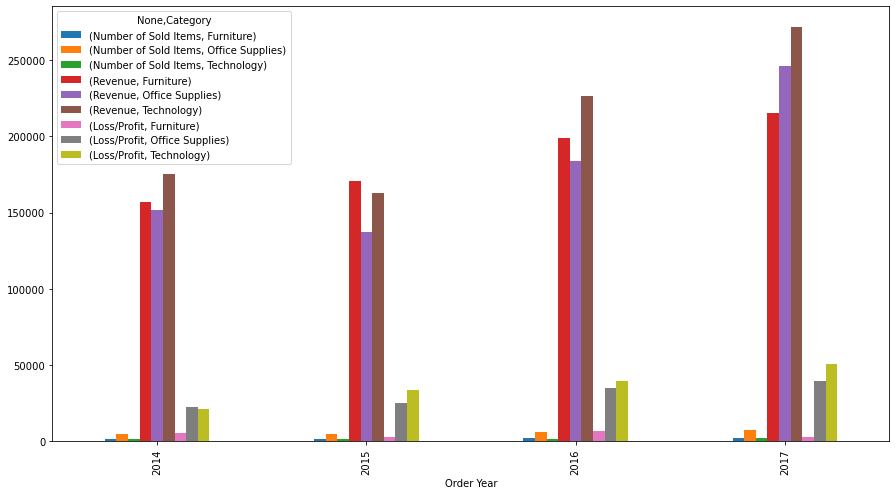

In [35]:
# 3
store_mega.reset_index().groupby(["Order Year", "Category"])[["Number of Sold Items", "Revenue", "Loss/Profit"]].sum().unstack().plot.bar(figsize=(15, 8))


In [36]:
store_mega.reset_index().groupby(["Order Year", "Category"])[["Number of Sold Items", "Revenue", "Loss/Profit"]].sum().unstack()


Number of Sold Items                                 Revenue  \
Category              Furniture Office Supplies Technology    Furniture   
Order Year                                                                
2014                       1623            4569       1389  157192.8531   
2015                       1775            4715       1489  170518.2370   
2016                       2193            5946       1698  198901.4360   
2017                       2437            7676       2363  215387.2692   

                                       Loss/Profit                              
Category   Office Supplies  Technology   Furniture Office Supplies  Technology  
Order Year                                                                      
2014            151776.412  175278.233   5457.7255      22593.4161  21492.8325  
2015            137233.463  162780.809   3015.2029      25099.5338  33503.8670  
2016            183939.982  226364.180   6959.9531      35061.2292  39773.9920  
2017            246097.175  271730.811   3018.3913      39736.6217  50684.2566

<AxesSubplot:xlabel='None,Order Year'>

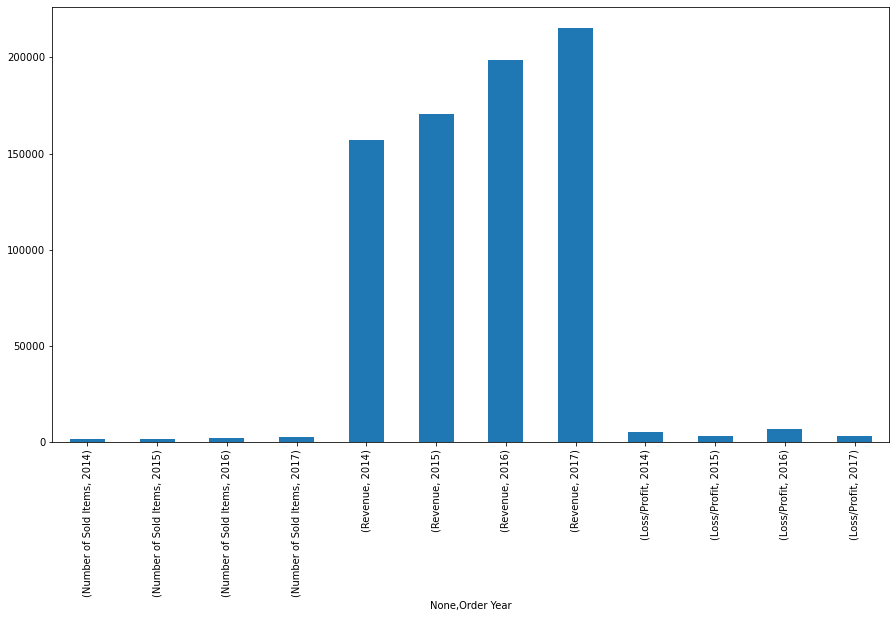

In [37]:
furniture = store_mega.reset_index()
furniture[furniture.Category == "Furniture"].reset_index().groupby(["Order Year"])[["Number of Sold Items", "Revenue", "Loss/Profit"]].sum().unstack().plot.bar(figsize=(15, 8))



<AxesSubplot:xlabel='None,Order Year'>

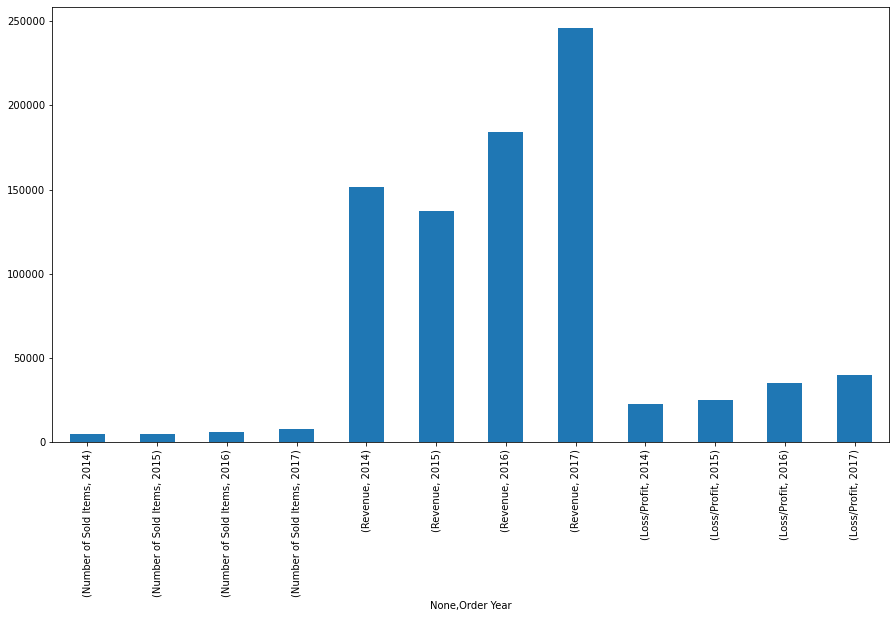

In [38]:
office = store_mega.reset_index()
office[office.Category == "Office Supplies"].reset_index().groupby(["Order Year"])[["Number of Sold Items", "Revenue", "Loss/Profit"]].sum().unstack().plot.bar(figsize=(15, 8))


<AxesSubplot:xlabel='None,Order Year'>

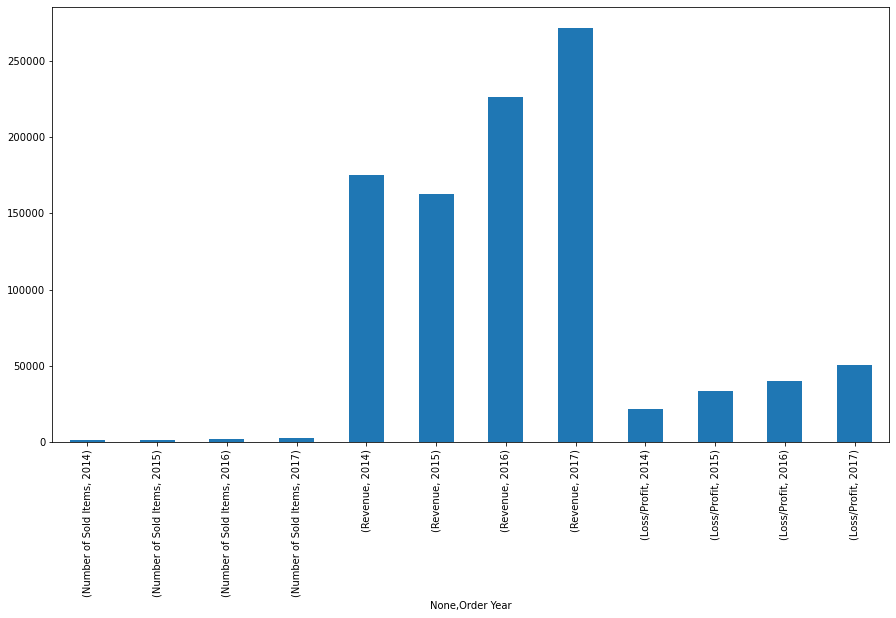

In [39]:
tech = store_mega.reset_index()
tech[tech.Category == "Technology"].reset_index().groupby(["Order Year"])[["Number of Sold Items", "Revenue", "Loss/Profit"]].sum().unstack().plot.bar(figsize=(15, 8))

<AxesSubplot:xlabel='Order Year'>

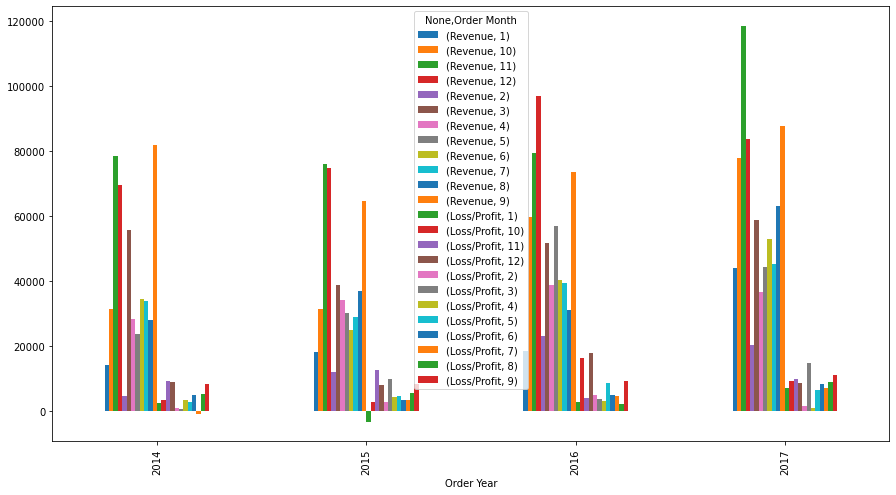

In [40]:
# 4 
store_mega.reset_index().groupby(["Order Year", "Order Month"])[["Revenue", "Loss/Profit"]].sum().unstack().plot.bar(figsize=(15, 8))



<AxesSubplot:xlabel='Region'>

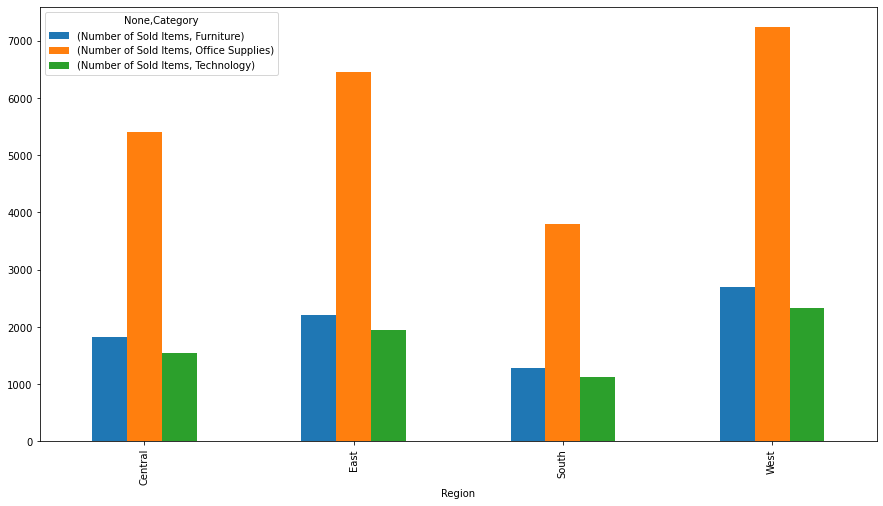

In [41]:
# 5 
store_mega.reset_index().groupby(["Region", "Category"])[["Number of Sold Items"]].sum().unstack().plot.bar(figsize=(15, 8))



<AxesSubplot:xlabel='Order Year,Region'>

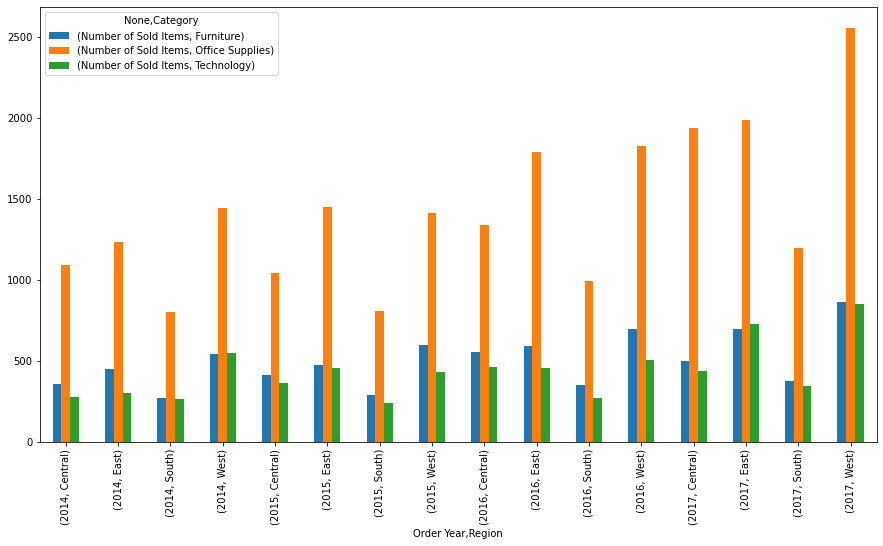

In [42]:
store_mega.reset_index().groupby(["Order Year", "Region", "Category"])[["Number of Sold Items"]].sum().unstack().plot.bar(figsize=(15, 8))



<AxesSubplot:xlabel='Segment'>

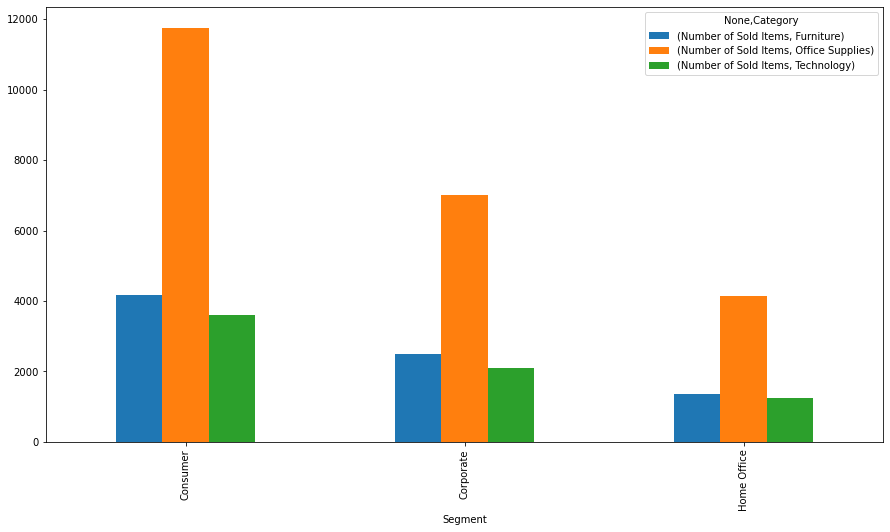

In [43]:
# 6
store_mega.reset_index().groupby(["Segment", "Category"])[["Number of Sold Items"]].sum().unstack().plot.bar(figsize=(15, 8))



<AxesSubplot:xlabel='Segment'>

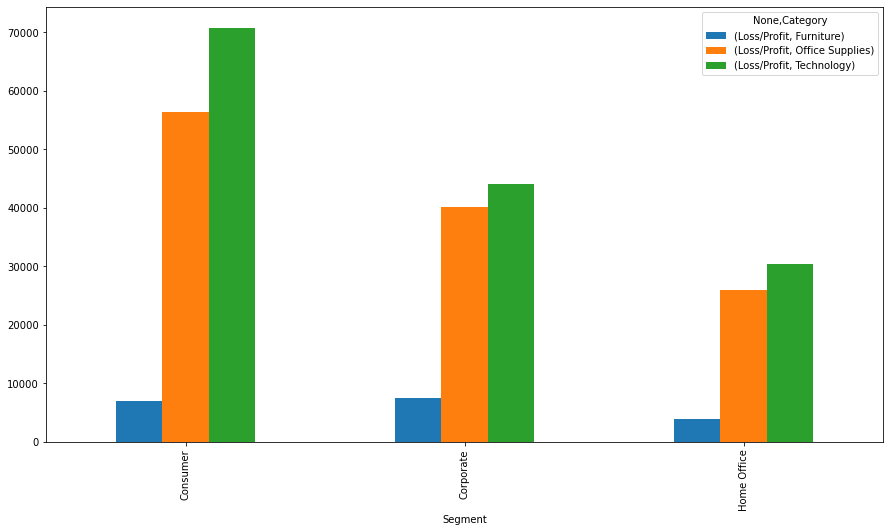

In [44]:
store_mega.reset_index().groupby(["Segment", "Category"])[["Loss/Profit"]].sum().unstack().plot.bar(figsize=(15, 8))



<AxesSubplot:xlabel='Segment'>

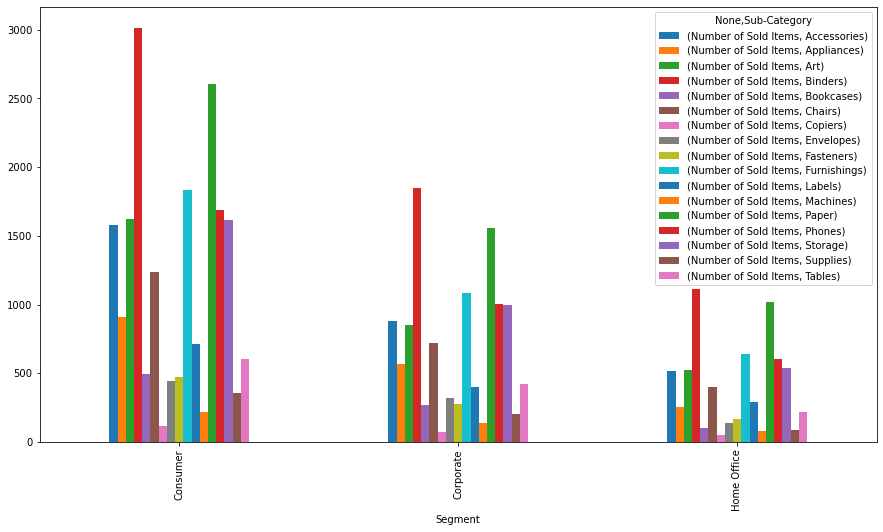

In [45]:
store_mega.reset_index().groupby(["Segment", "Sub-Category"])[["Number of Sold Items"]].sum().unstack().plot.bar(figsize=(15, 8))


<AxesSubplot:xlabel='Segment'>

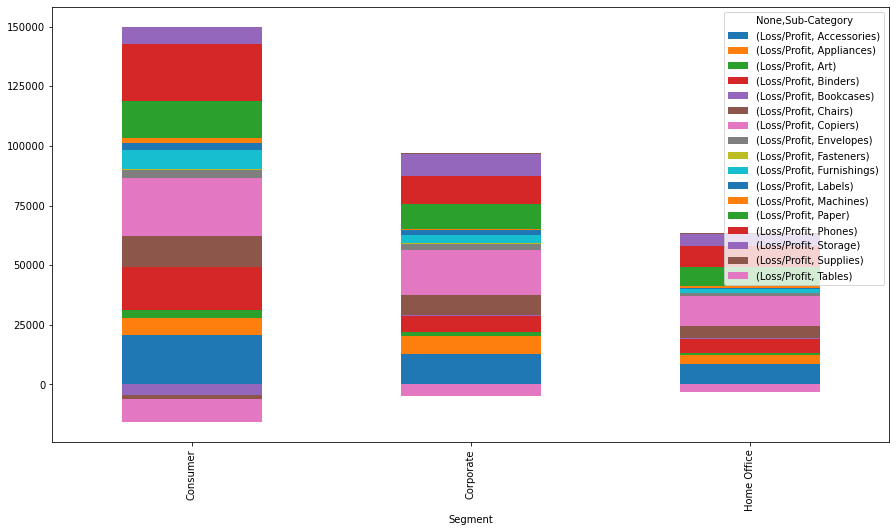

In [46]:
store_mega.reset_index().groupby(["Segment", "Sub-Category"])[["Loss/Profit"]].sum().unstack().plot.bar(stacked=True, figsize=(15, 8))


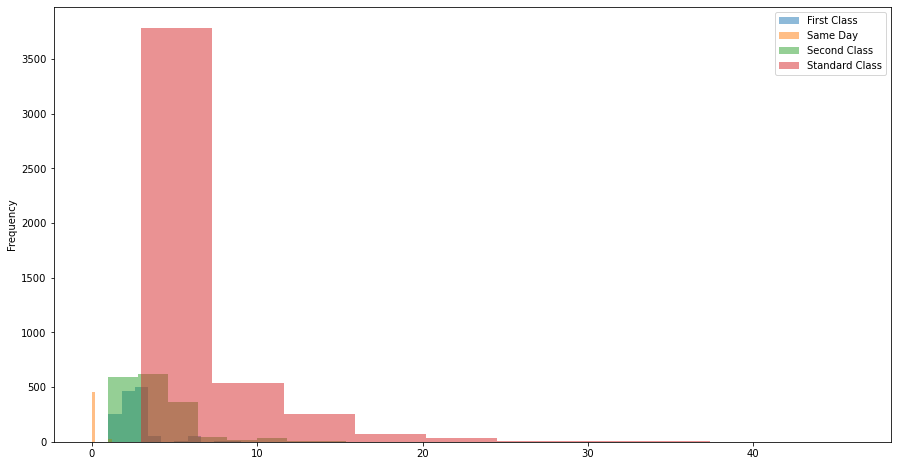

In [47]:
# 7 
hist = store_mega.groupby("Ship Mode").diff_days.plot.hist(figsize=(15, 8), alpha=0.5, legend=True)



<AxesSubplot:xlabel='Order Year'>

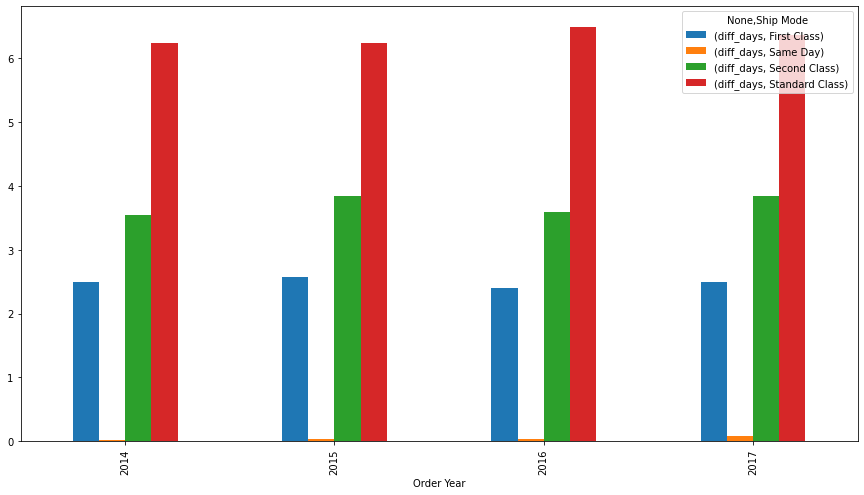

In [50]:

store_mega.reset_index().groupby(["Order Year", "Ship Mode"])[["diff_days"]].mean().unstack().plot.bar(figsize=(15, 8))


In [51]:
store_mega.reset_index().groupby(["Order Year", "Ship Mode"])[["diff_days"]].mean()

diff_days
Order Year Ship Mode                
2014       First Class      2.490494
           Same Day         0.025316
           Second Class     3.547550
           Standard Class   6.240246
2015       First Class      2.581673
           Same Day         0.040000
           Second Class     3.843575
           Standard Class   6.246589
2016       First Class      2.399417
           Same Day         0.035971
           Second Class     3.587558
           Standard Class   6.491301
2017       First Class      2.496957
           Same Day         0.079268
           Second Class     3.838129
           Standard Class   6.371333

In [56]:
# 8 
store_mega.reset_index().groupby(["Segment", "Ship Mode"])[["Number of Sold Items"]].sum().unstack()

Number of Sold Items                                     
Ship Mode            First Class Same Day Second Class Standard Class
Segment                                                              
Consumer                    2765     1131         3873          11752
Corporate                   1861      436         2317           6994
Home Office                 1067      393         1233           4051